In [164]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

In [149]:
#See orginal dataframe
df = pd.read_csv("/Users/jordankavishe/Desktop/data1030/midterm/support2.csv")
df.shape

(9105, 47)

In [159]:
df.dtypes.where(lambda x: x == 'object').dropna()

sex        object
dzgroup    object
dzclass    object
income     object
race       object
ca         object
dnr        object
sfdm2      object
dtype: object

In [157]:
df['dzgroup'].value_counts()

dzgroup
ARF/MOSF w/Sepsis    3515
CHF                  1387
COPD                  967
Lung Cancer           908
MOSF w/Malig          712
Coma                  596
Colon Cancer          512
Cirrhosis             508
Name: count, dtype: int64

# Deal with missing values where the feature has less than 100 instances of missing values

In [3]:
def find_nulls(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have more than n missing instances'''
    null_series = dataframe.isnull().sum().where(lambda x: x > n).dropna()
    return null_series

In [4]:
def find_null_ints(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have exactly n missing instances'''
    null_series_int = dataframe.isnull().sum().where(lambda x: x == n).dropna()
    null_series_int_list = null_series_int.index.to_list()
    return null_series_int, null_series_int_list

In [144]:
extreme_null_df = df.dropna()
extreme_null_df.shape # Dataframe if you dropped ALL missing values

(306, 47)

In [5]:
null_df = df[df.isnull().any(axis=1)]
print(f"Percentage of rows with at least one missing value: {null_df.shape[0] / df.shape[0]}")

Percentage of rows with at least one missing value: 0.9663920922570016


In [6]:
null_features = find_nulls(df, 0).index.to_list()
print(f"There are {len(null_features)} features with at least one missing values. \n These features are: {null_features}")


There are 33 features with at least one missing values. 
 These features are: ['edu', 'income', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2']


In [107]:
# Percentage of each feature that are missing
missing_feature_percentages = {}
for n in null_features:
    null_percent = null_df[null_df[n].isnull()].shape[0] / df.shape[0]
    missing_feature_percentages[n] =  null_percent
    print(f"Percetage of {n} features missing: {null_percent}")

Percetage of edu features missing: 0.18384338433843384
Percetage of income features missing: 0.3355085508550855
Percetage of scoma features missing: 0.0001125112511251125
Percetage of charges features missing: 0.01935193519351935
Percetage of totcst features missing: 0.0999099909990999
Percetage of totmcst features missing: 0.390976597659766
Percetage of avtisst features missing: 0.009225922592259225
Percetage of race features missing: 0.004725472547254726
Percetage of sps features missing: 0.0001125112511251125
Percetage of aps features missing: 0.0001125112511251125
Percetage of surv2m features missing: 0.0001125112511251125
Percetage of surv6m features missing: 0.0001125112511251125
Percetage of prg2m features missing: 0.18553105310531054
Percetage of prg6m features missing: 0.18373087308730873
Percetage of dnr features missing: 0.0033753375337533752
Percetage of dnrday features missing: 0.0033753375337533752
Percetage of meanbp features missing: 0.0001125112511251125
Percetage of w

In [137]:
# Dataframe for percentage of each feature missing
missing_value_percents = pd.DataFrame(missing_feature_percentages,  index=[0])
missing_value_percents = missing_value_percents.melt(var_name='Feauture', value_name='Percent of missing values')

In [8]:
# Drop all the features with only one missing values
null_ones = df.isnull().sum().where(lambda x: x == 1).dropna().index.to_list()
df.dropna(subset=null_ones, inplace=True)
df.shape

(9103, 47)

In [9]:
# Drop all the features with less than 100 missing values
null_greater_than_one = find_nulls(df, 0).where(lambda x: x < 100).dropna().index.to_list()
df.dropna(subset=null_greater_than_one, inplace=True)
df.shape

(8888, 47)

In [162]:
find_nulls(df, 100)

edu        1634.0
income     2982.0
charges     172.0
totcst      888.0
totmcst    3475.0
prg2m      1649.0
prg6m      1633.0
wblc        212.0
pafi       2325.0
alb        3372.0
bili       2601.0
ph         2284.0
glucose    4500.0
bun        4352.0
urine      4862.0
adlp       5641.0
adls       2867.0
sfdm2      1400.0
dtype: float64

# EDA

In [11]:
# Total hospital deaths by race
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    print(f"{r} total deaths: {death_count}")


other total deaths: 37
white total deaths: 1798
black total deaths: 378
hispanic total deaths: 68
asian total deaths: 30


In [12]:
# Total death rate by race
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    total_amount = df[df["race"] == r].shape[0]
    death_rate = death_count / total_amount 
    print(f"{r} death rate: {death_rate}")

other death rate: 0.3394495412844037
white death rate: 0.2552889393724265
black death rate: 0.2765179224579371
hispanic death rate: 0.23448275862068965
asian death rate: 0.379746835443038


<BarContainer object of 5 artists>

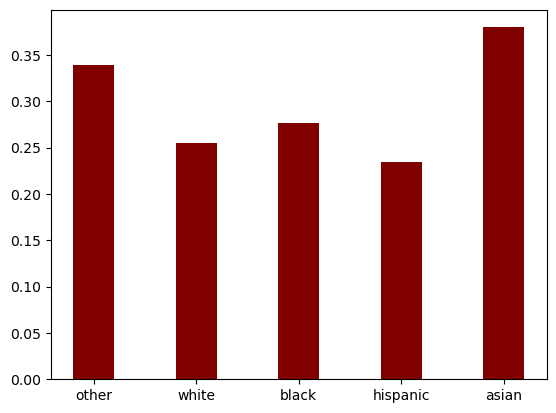

In [19]:
# Bar graph showing total death rate by race

data = {
    'other': 0.3394495412844037, 
    'white': 0.2552889393724265,
    'black': 0.2765179224579371,
    'hispanic': 0.23448275862068965,
    'asian': 0.379746835443038
}

hospdead_percents = pd.DataFrame(list(data.items()), columns=['Race', 'Percent'])

data

races = data.keys()
hospdead_rate = data.values()
plt.bar(races, hospdead_rate, color ='maroon', 
        width = 0.4)

In [65]:
# Overall death rate broken down by race

overall_death = {}
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    total_amount = df[df['hospdead'] == 1].shape[0]
    death_rate = death_count / total_amount 
    overall_death[r] = death_rate
    print(f"{r} death rate: {death_rate}")

overall_death

other death rate: 0.016010385114668974
white death rate: 0.7780181739506707
black death rate: 0.1635655560363479
hispanic death rate: 0.02942449156209433
asian death rate: 0.012981393336218087


{'other': 0.016010385114668974,
 'white': 0.7780181739506707,
 'black': 0.1635655560363479,
 'hispanic': 0.02942449156209433,
 'asian': 0.012981393336218087}

In [173]:
df['dzgroup'].unique()

array(['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], dtype=object)

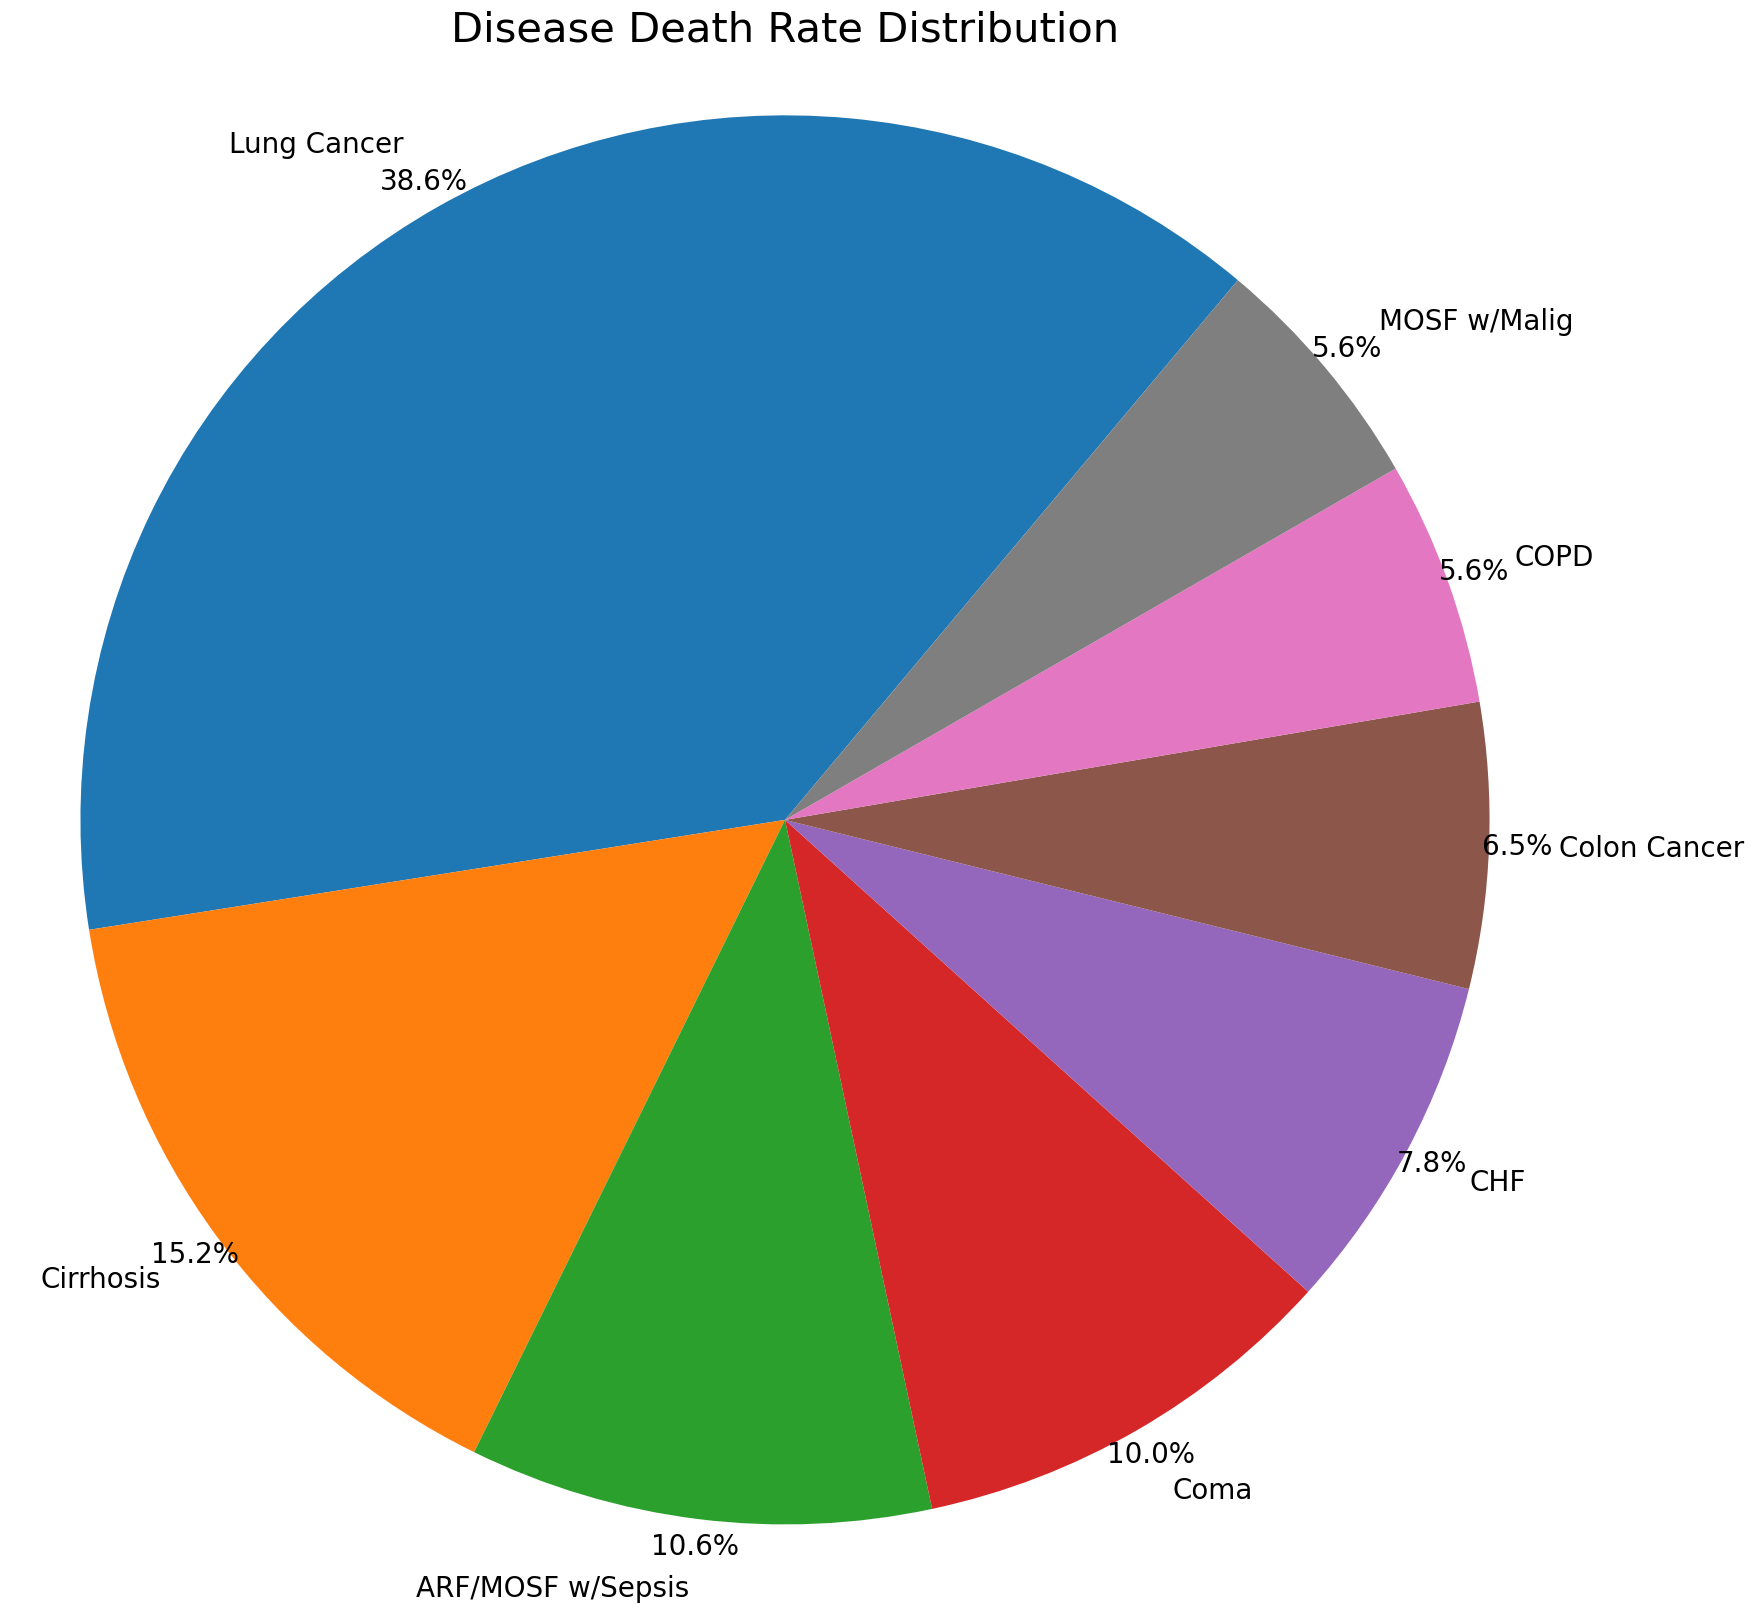

In [176]:
plt.figure(figsize=(20, 20))
plt.pie(df['dzgroup'].value_counts(), labels=['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], autopct='%1.1f%%', startangle=50, pctdistance=1.04, textprops={'fontsize': 20})
plt.title('Disease Death Rate Distribution', fontsize=30)
plt.axis('equal')
plt.show()

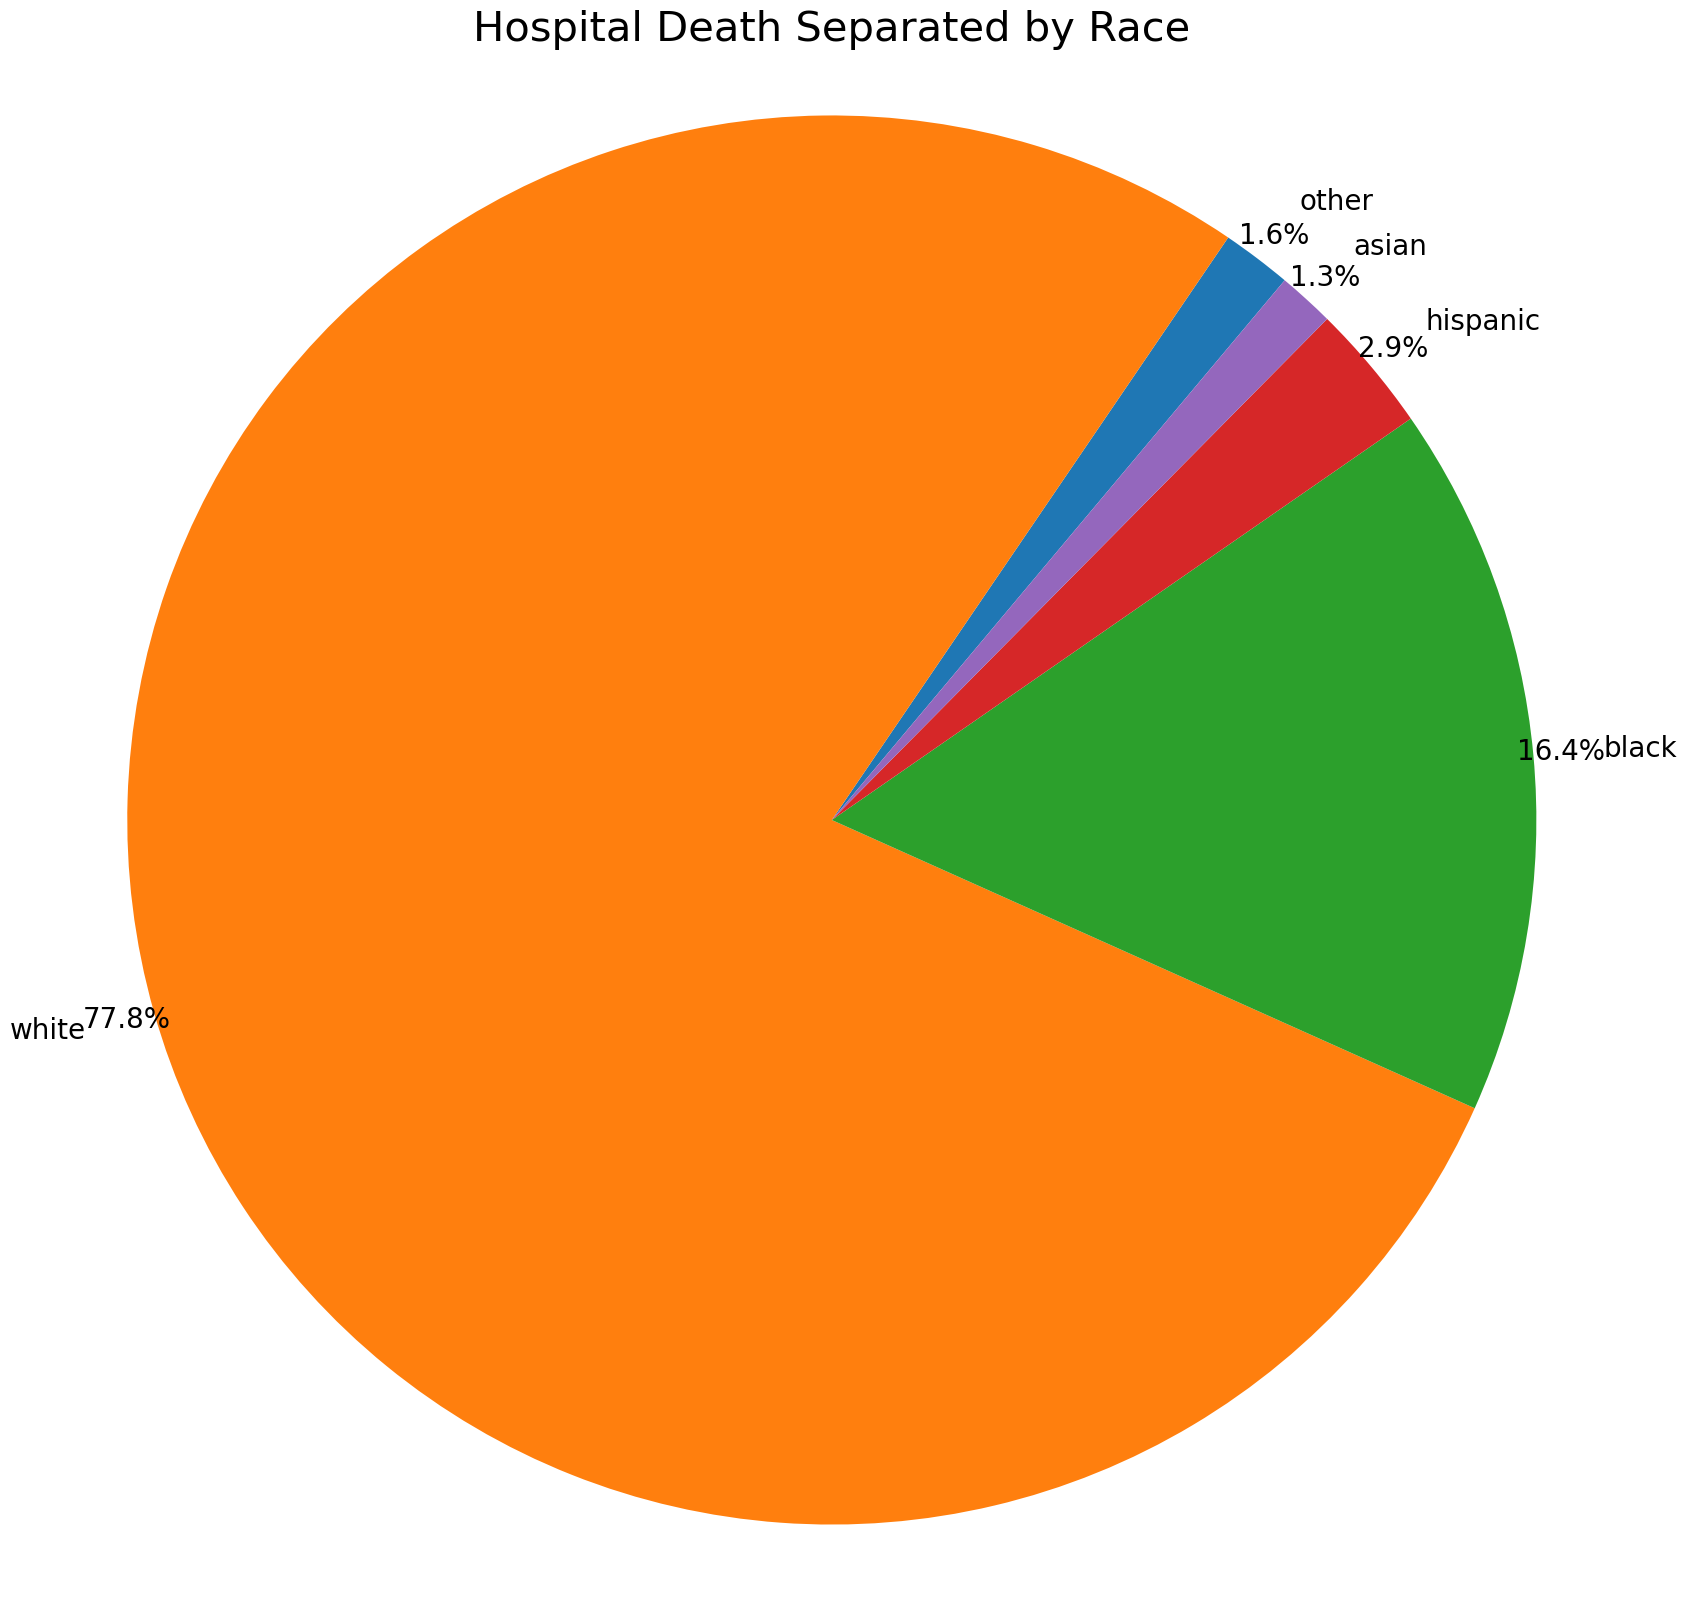

In [161]:
# Pie Chart


plt.figure(figsize=(20, 20))
plt.pie(overall_death.values(), labels=overall_death.keys(), autopct='%1.1f%%', startangle=50, pctdistance=1.04, textprops={'fontsize': 20})
plt.title('Hospital Death Separated by Race', fontsize=30)
plt.axis('equal')
plt.show()

In [21]:
# Diseases of patients recorded by income level
income_df = df.groupby(by=['income'])
income_df = income_df['dzgroup'].value_counts().to_frame().unstack()
income_df.reset_index(inplace=True)
income_df

income             count                                        \
dzgroup             ARF/MOSF w/Sepsis  CHF COPD Cirrhosis Colon Cancer Coma   
0          $11-$25k               570  253  151        73           84   90   
1          $25-$50k               403  131   55        53           83   53   
2             >$50k               217   87   29        40           83   41   
3        under $11k              1071  490  434       201           67  172   

                                  
dzgroup Lung Cancer MOSF w/Malig  
0               161          112  
1               145          113  
2                99           74  
3               187          176

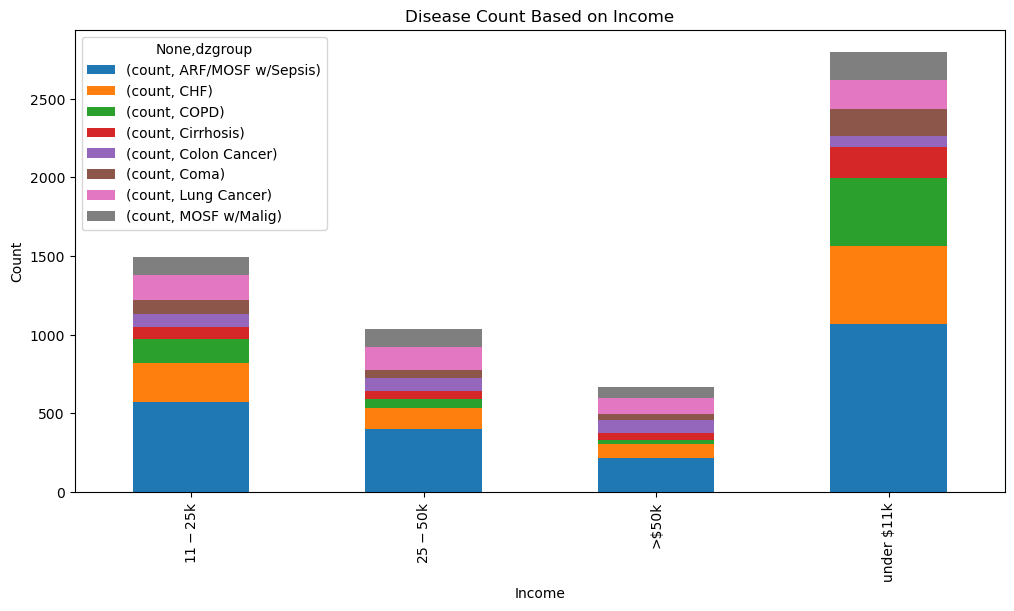

In [55]:
# Stacked Bar Graph for Diseases of patients recorded by income level

income_df.plot(kind='bar', x='income', stacked=True, figsize=(12, 6))
plt.title('Disease Count Based on Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [49]:
# Diseases of patients recorded by sex

gender_df = df.groupby(by=['sex'])
gender_disease_df = gender_df['dzgroup'].value_counts().to_frame().unstack()
gender_disease_df.reset_index(inplace=True)


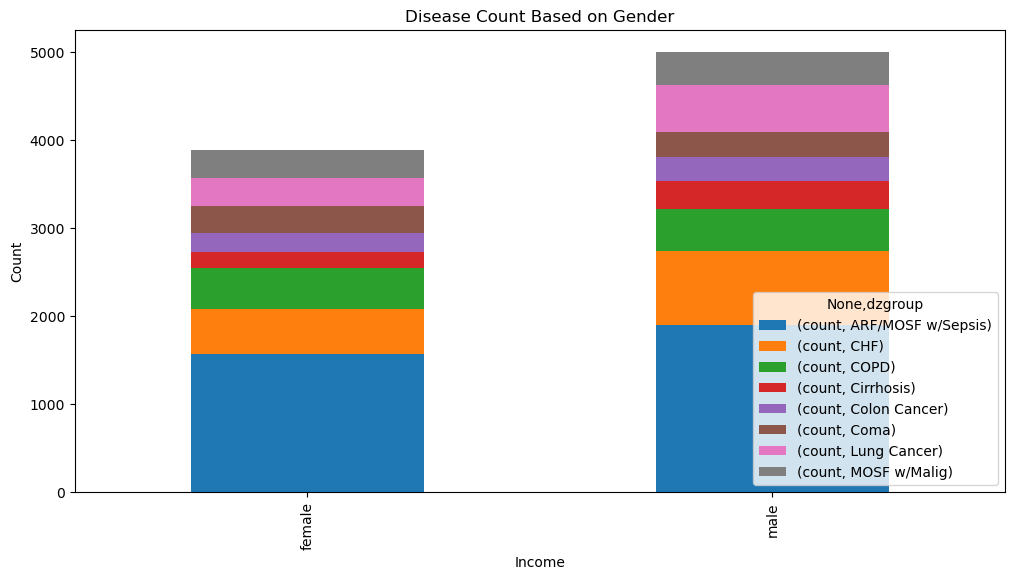

In [141]:
# Stacked bar grpah of diseases of patients recorded by sex

gender_by_disease_df = gender_disease_df.plot(kind='bar', x='sex', stacked=True, figsize=(12, 6))
plt.title('Disease Count Based on Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [54]:
df['sex'].value_counts()

sex
male      5004
female    3884
Name: count, dtype: int64

In [53]:
gender_df['hospdead'].sum()

sex
female    1028
male      1283
Name: hospdead, dtype: int64

In [119]:
df['prg2m'].describe()

count    7456.000000
mean        0.618769
std         0.298367
min         0.000000
25%         0.500000
50%         0.700000
75%         0.900000
max         1.000000
Name: prg2m, dtype: float64

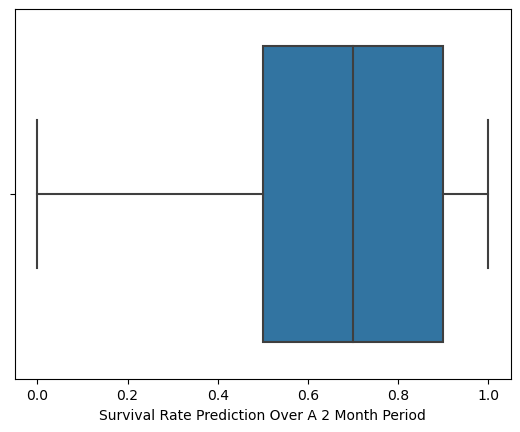

In [142]:
sns.boxplot(data=df, x='prg2m')
plt.xlabel("Survival Rate Prediction Over A 2 Month Period")
plt.show()

In [120]:
df['prg6m'].describe()

count    7472.000000
mean        0.499679
std         0.304367
min         0.000000
25%         0.200000
50%         0.500000
75%         0.750000
max         1.000000
Name: prg6m, dtype: float64

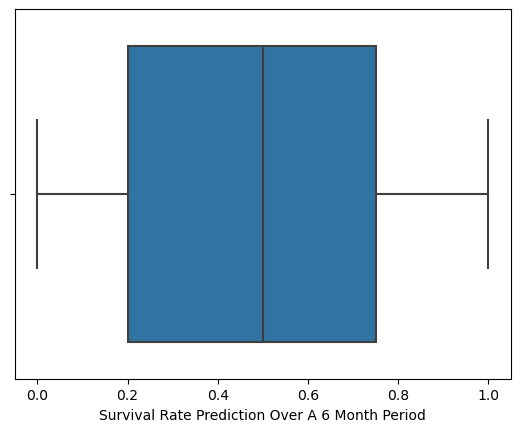

In [121]:
sns.boxplot(data=df, x='prg6m')
plt.xlabel("Survival Rate Prediction Over A 6 Month Period")
plt.show()

In [92]:
df.groupby(by=['dzgroup'])['prg6m'].value_counts()

dzgroup            prg6m   
ARF/MOSF w/Sepsis  0.500000    401
                   0.800000    266
                   0.900000    244
                   0.700000    218
                   0.600000    217
                              ... 
MOSF w/Malig       0.008000      1
                   0.000343      1
                   0.000064      1
                   0.000008      1
                   0.015625      1
Name: count, Length: 328, dtype: int64

# Splitting 

In [122]:
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

In [134]:
y = df['hospdead']
print(y.value_counts())

hospdead
0    6745
1    2360
Name: count, dtype: int64


In [148]:
random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=random_state, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, random_state=random_state, stratify=y_other)

print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))


**balance with stratification:**
(array([0, 1]), array([4047, 1416]))
(array([0, 1]), array([1349,  472]))
(array([0, 1]), array([1349,  472]))


In [169]:
sgss = StratifiedShuffleSplit(n_splits=5, train_size=0.6, random_state=random_state)
sgss.get_n_splits(X, y)

for i, (train_index, test_index) in enumerate(sgss.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[4332 6468 5460 ... 1019 1450 7434]
  Test:  index=[1165 1453 7365 ... 2728 3859 6681]
Fold 1:
  Train: index=[  61  221 2731 ... 6364 2378 4315]
  Test:  index=[8523 5504 3463 ... 5253 6045  260]
Fold 2:
  Train: index=[7235 3843 5804 ... 7554 2532 6627]
  Test:  index=[3061 4926 2375 ... 1868 5482 7291]
Fold 3:
  Train: index=[ 545 7343 2772 ... 8529 6391 6383]
  Test:  index=[1610 8350 5915 ... 4622 4070  762]
Fold 4:
  Train: index=[3878 5749 6795 ...  279 2746 8459]
  Test:  index=[1560 3502  809 ... 2688  288 8505]


# Preprocessing

In [161]:
df.dtypes.where(lambda x: x == 'object').dropna().index.to_list()

['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2']

In [162]:
df_objects = df.dtypes.where(lambda x: x == 'object').dropna().index.to_list()
for o in df_objects:
    print(f"{o} unique values: {df[o].unique()}")

sex unique values: ['male' 'female']
dzgroup unique values: ['Lung Cancer' 'Cirrhosis' 'ARF/MOSF w/Sepsis' 'Coma' 'CHF' 'Colon Cancer'
 'COPD' 'MOSF w/Malig']
dzclass unique values: ['Cancer' 'COPD/CHF/Cirrhosis' 'ARF/MOSF' 'Coma']
income unique values: ['$11-$25k' 'under $11k' nan '$25-$50k' '>$50k']
race unique values: ['other' 'white' 'black' 'hispanic' 'asian']
ca unique values: ['metastatic' 'no' 'yes']
dnr unique values: ['no dnr' 'dnr after sadm' 'dnr before sadm']
sfdm2 unique values: [nan '<2 mo. follow-up' 'no(M2 and SIP pres)' 'SIP>=30'
 'adl>=4 (>=5 if sur)' 'Coma or Intub']


In [163]:
df.drop(columns=['income', 'sfdm2'], inplace=True)

In [164]:
df.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst',
       'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes',
       'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc',
       'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
       'glucose', 'bun', 'urine', 'adlp', 'adls', 'adlsc'],
      dtype='object')

In [165]:
df_objects

['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2']

In [151]:
enc = OneHotEncoder() 
  
# Passing encoded columns 
encoded_data = enc.fit_transform(df[['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']])

column_names = enc.get_feature_names_out(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr'])

enc_data = pd.DataFrame(encoded_data.toarray(), columns=column_names)

 
# Merge with main 
new_df = df.join(enc_data) 
new_df.drop(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr'], axis=1, inplace=True)
new_df.shape

(9105, 68)